In [ ]:
!pip install "gymnasium[classic-control]"


In [ ]:
!pip install gymnasium

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pygame

In [ ]:
import gymnasium as gym

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="human")

# Initialize the environment
obs, info = env.reset()

for _ in range(200):  # Run for 200 timesteps
    action = env.action_space.sample()  # Take random actions
    obs, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:  # Check if the episode is over
        obs, info = env.reset()

env.close()  # Close the environment


In [ ]:
# Parameters for Q-learning
n_bins = (6, 12, 6, 12)  # Discretization bins for each state variable
n_actions = 2  # Number of actions: left (0) or right (1)
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Epsilon decay factor per episode
min_epsilon = 0.01  # Minimum exploration rate
episodes = 1000  # Number of training episodes
test_episodes = 100

In [ ]:
def discretize_state(state, bins):

    upper_bounds = [4.8, 5, 4.8, 5]  # Environment state bounds
    lower_bounds = [-0.418, -5, -0.418, -5]
    ratios = [(state[i] - lower_bounds[i]) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    return tuple(int(np.digitize(ratios[i], np.linspace(0, 1, bins[i])) - 1) for i in range(len(state)))

In [ ]:
q_table = np.random.uniform(low=-1, high=1, size=n_bins + (n_actions,))

In [ ]:
def epsilon_greedy_policy(state, epsilon):
    if np.random.random() < epsilon:
        return np.random.choice(n_actions)  # Explore
    return np.argmax(q_table[state])

In [ ]:
env = gym.make("CartPole-v1", render_mode=None)
reward_history = []

In [ ]:
for episode in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state, n_bins)
    total_reward = 0

    terminated = False
    while not terminated:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state, n_bins)
        total_reward += reward

        # Update Q-value using Q-learning formula
        best_future_q = np.max(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * best_future_q - q_table[state][action])

        state = next_state


    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    reward_history.append(total_reward)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes}: Average Reward: {np.mean(reward_history[-100:])}")

env.close()

Episode 100/1000: Average Reward: 22.68
Episode 200/1000: Average Reward: 21.03
Episode 300/1000: Average Reward: 20.42
Episode 400/1000: Average Reward: 20.62
Episode 500/1000: Average Reward: 21.08
Episode 600/1000: Average Reward: 22.55
Episode 700/1000: Average Reward: 22.76
Episode 800/1000: Average Reward: 23.12
Episode 900/1000: Average Reward: 23.07
Episode 1000/1000: Average Reward: 23.25


In [ ]:
print("Testing trained agent...")
test_rewards = []
env = gym.make("CartPole-v1", render_mode="human")

for _ in range(test_episodes):
    state, _ = env.reset()
    state = discretize_state(state, n_bins)
    total_reward = 0

    terminated = False
    while not terminated:
        action = np.argmax(q_table[state])  # Exploit learned policy
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state, n_bins)
        total_reward += reward
        state = next_state

    test_rewards.append(total_reward)

env.close()

print(f"Average Reward over {test_episodes} test episodes: {np.mean(test_rewards)}")

Testing trained agent...
Average Reward over 100 test episodes: 23.88


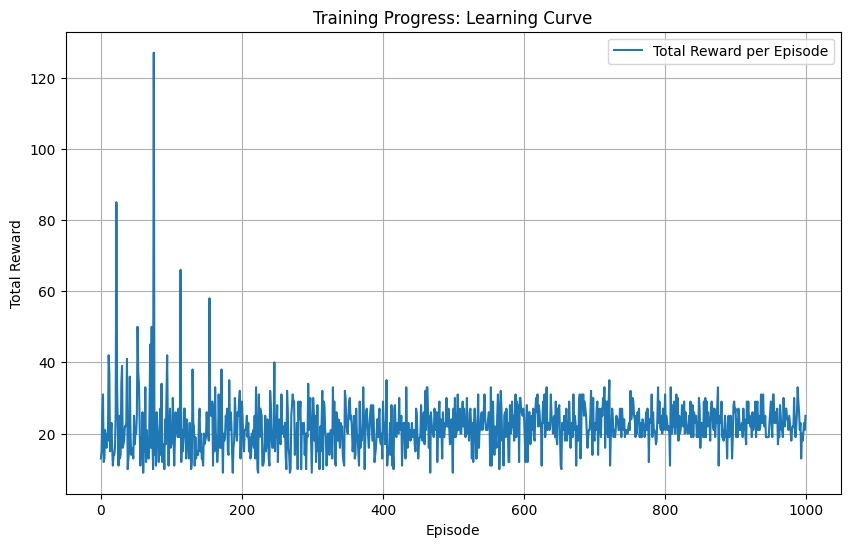

In [ ]:
# Plot training rewards
plt.figure(figsize=(10, 6))
plt.plot(reward_history, label="Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress: Learning Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Display performance summary
average_test_reward = np.mean(test_rewards)
print(f"Average Reward over {test_episodes} test episodes: {average_test_reward}")

Average Reward over 100 test episodes: 23.88


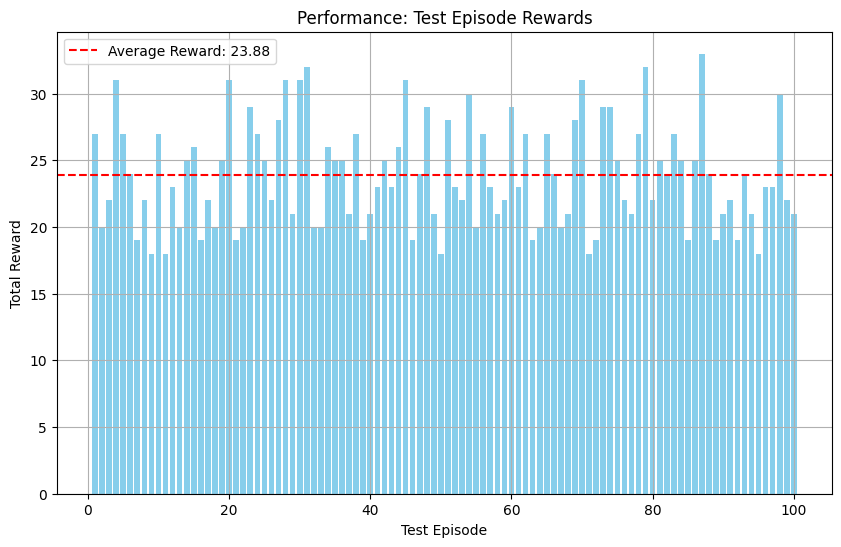

In [ ]:
# Plot test performance
plt.figure(figsize=(10, 6))
plt.bar(range(1, test_episodes + 1), test_rewards, color='skyblue')
plt.axhline(average_test_reward, color='red', linestyle='--', label=f"Average Reward: {average_test_reward:.2f}")
plt.xlabel("Test Episode")
plt.ylabel("Total Reward")
plt.title("Performance: Test Episode Rewards")
plt.legend()
plt.grid()
plt.show()